## 시계열분석
### (시계열 자료 : 시간의 경과에 따라 연속적)
- 시간경과에 따른 관측값의 변화를 패턴으로 인식
- 시계열 추정 => 미래 변화 추정 

### 반응변수(y) ~ 설명변수(시간, t)
- 미래추정
- 계절성 자료 : 시간 축을 기준으로 계절성이 있는 데이터로
- 모수검정 : 선형성, 정규성, 등분산성
- 추론기능 : 유의수준 판단 기준 존재
- 활용분야 : 경기예측, 판매예측, 주식시장 분석 등

### 시계열분석 적용범위
### 회귀분석 vs 시계열분석
- 회귀분석 : 데이터의 분포, 데이터간 상관성
- 시계열분석 : 시간의 변화에 따라 현재시점(t)과 이전시점(t-1)의 상관성
- 시간의 경과에 따라 오차가 중첩, 분산 증가 => 먼 미래를 예측X, 가까운 미래 추정

- 기존사실에 관한 결과 규명 : 주별, 월별, 분기별, 연도별 분석 => 구매패턴 분석
- 시계열 자료 특성 : 추세, 계절, 순환, 불규칙 요소를 분해 (시계열 요소 분해법)
- 가까운 미래에 대한 시나리오 규명
- 변수와 변수의 관계 규명
- 변수 제어 결과 규명

### 시계열 자료분석
### 정상성(stationary) 
- 뚜렷한 추세가 없음, 시계열의 평균이 시간축에 평행하게 나타남
- 변화패턴이 일정한 평균값을 중심으로 일정한 변동폭
- 평균이 0이며 일정한 분산을 가지는 정규분포에서
- 추출된 임의의 값으로 불규칙성(독립성)을 가짐 
- (불규칙성 = 백색 잡음 (white noise))

### 비정상성(non-stationary)
- 대부분의 시계열 자료는 비정상성 시계열
- 규칙성(비독립성)을 가지는 패턴
- 분산이 불규칙 or 시간의 흐름에 점진적으로 증가/하강 (추세)
- 일정한 주기 단위로 동일한 규칙 반복 (계절)
- 시계열 자료의 추세선, 시계열 요소 분해, 자기상관함수의 시각화 

### 비정상성 => 정상성 => 시계열 모형 생성
### 차분 : 현재 시점에서 이전 시점의 자료를 빼는 연산, 평균 정상화 
### 로그변환 : 분산 정상화




In [2]:
library(tidyverse)

In [5]:
## 비정상성 시계열을 정상성 시계열로 변경
data(AirPassengers) 
glimpse(AirPassengers) # Time-Series (시계열 자료)

 Time-Series [1:144] from 1949 to 1961: 112 118 132 129 121 135 148 148 136 119 ...


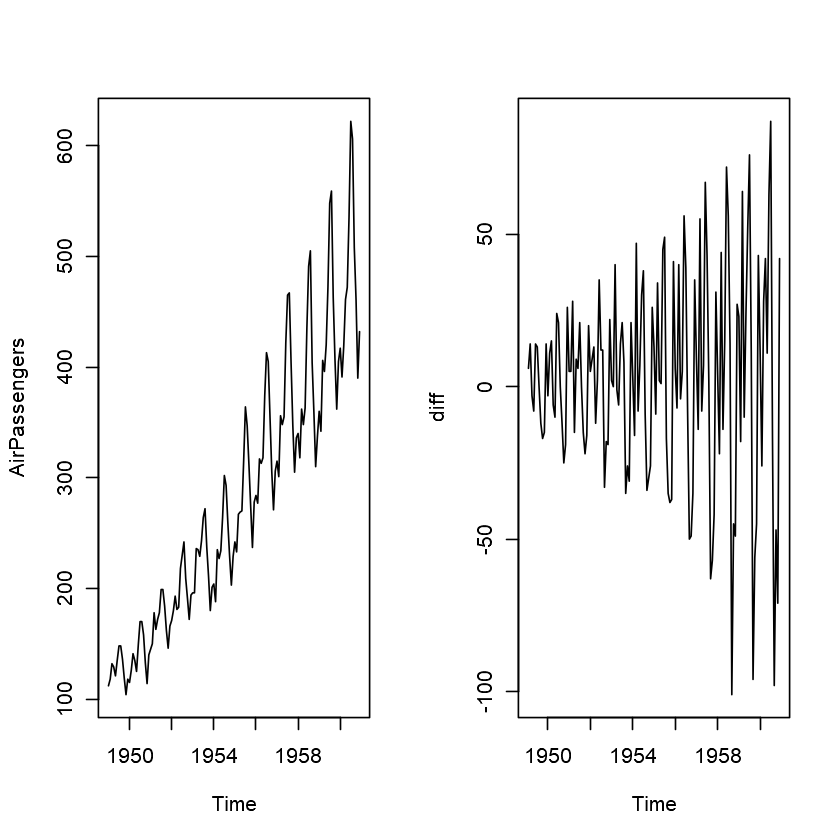

In [7]:
par(mfrow = c(1, 2))
ts.plot(AirPassengers) # 시게열 시각화
diff <- diff(AirPassengers) # 차분 (평균 정상화)
plot(diff)

- 차분의 결과가 대체로 일정한 값 => 선형의 추세를 가짐
- if 시계열에 계절성 존재 => 계절 차분 수행
- 차분된 것을 다시 차분했을대 일정한 값을 보임 => 2차식의 추세를 가짐

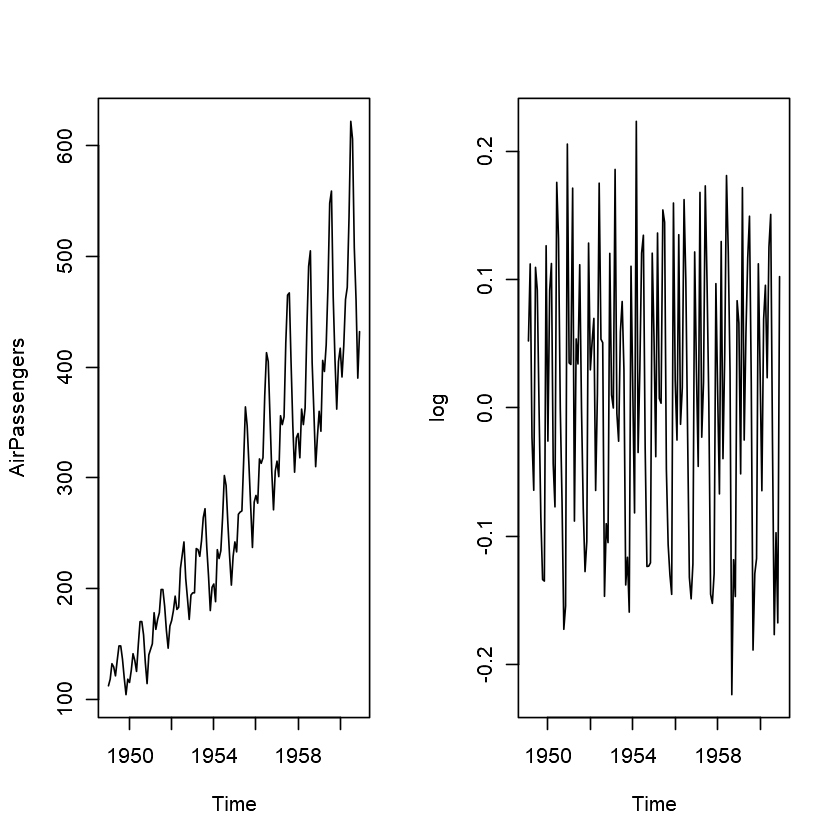

In [8]:
par(mfrow = c(1, 2))
ts.plot(AirPassengers)
log <- diff(log(AirPassengers)) # 로그변환 (분산 정상화) + 차분 (평균 정상화)
plot(log) 

- 로그변환의 1차 차분이 일정한 값을 가짐 => 분산이 정상화 되었다
- 시계열의 추세를 찾아낸 후, 원 시계열에서 추세를 제거 => 추세가 없는 시계열 => 정상적 시계열

## 시계열 자료 시각화
### 시계열 추세선 시각화
### 시게열 추세선 : 시간의 경과에 따라 시계열 자료의 값이 변하는 과정

In [10]:
## 단일 시계열 자료 시각화
data("WWWusage")
WWWusage %>% glimpse

 Time-Series [1:100] from 1 to 100: 88 84 85 85 84 85 83 85 88 89 ...


In [ ]:
ts.plot(WWWusage, type = "l", col = "red") # 시계열 추세선 

In [13]:
## 다중 시계열 자료 시각화 
data(EuStockMarkets)

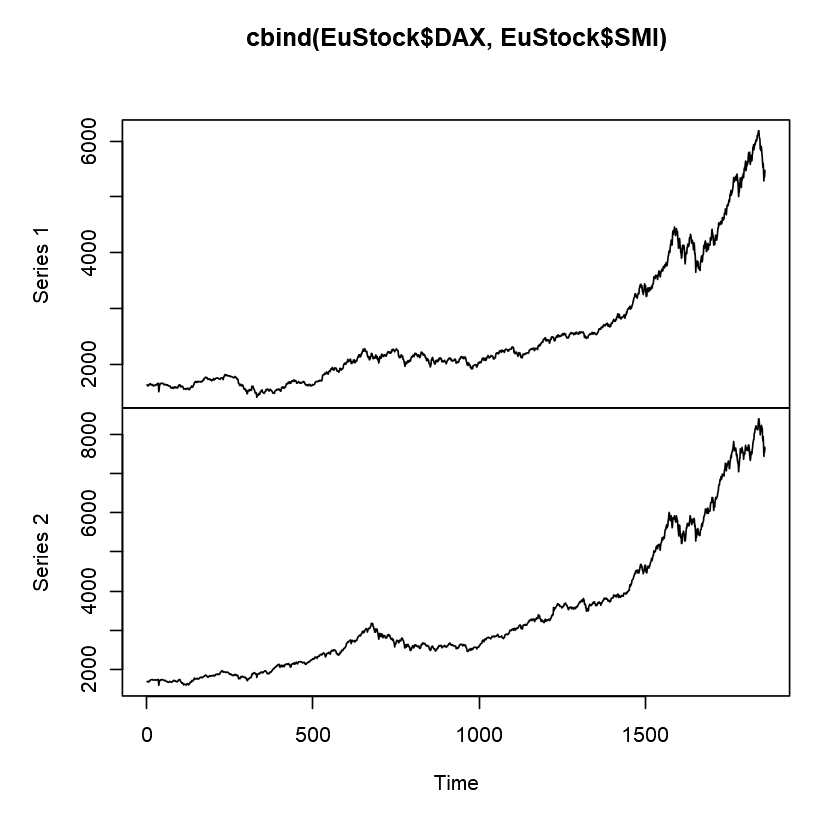

In [17]:
EuStock <- data.frame(EuStockMarkets)

ts.plot(EuStock$DAX, type = "l", col = "red") # 단일 시계열 시각화
plot.ts(cbind(EuStock$DAX, EuStock$SMI)) # 다중 시계열 자료 추세선 시각화

## 시계열 요소 분해 
- 시계열 자료 분석을 위해, 시계열 요소 분해

### 시계열 자료의 변동요인
### 추세변동 (Trend variation, T)
- 인구변동, 지각변동, 기술변화 등의 상승과 하락의 영향을 받아
- 시계열에 영향을 주는 장기 변동요인

### 순환변동 (Cyclical, C) 
- 2 ~ 10년 주기 일정한 기간 없이 반복적 요소를 가지는 중장기 변동요인

### 계절변동 (Seasonal, S)
- 일정한 기간(월, 요일, 분기 등)에 의해, 
- 1년을 단위로 반복적인 요소를 가지는 단기 변동요인  

### 불규칙변동 (Irregular, I) : 
- 규칙 없이 예측 불가능한 변동요인
- 추세, 순환, 계절요인으로 설명 불가능한 요인
- 실제 시계열 - (추세, 순환, 계절) = 불규칙변동
- 회귀분석의 오차에 해당

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,45,56,45,43,69,75,58,59,66,64,62,65
2017,55,49,67,55,71,78,71,65,69,43,70,75
2018,56,56,65,55,82,85,75,77,77,69,79,89


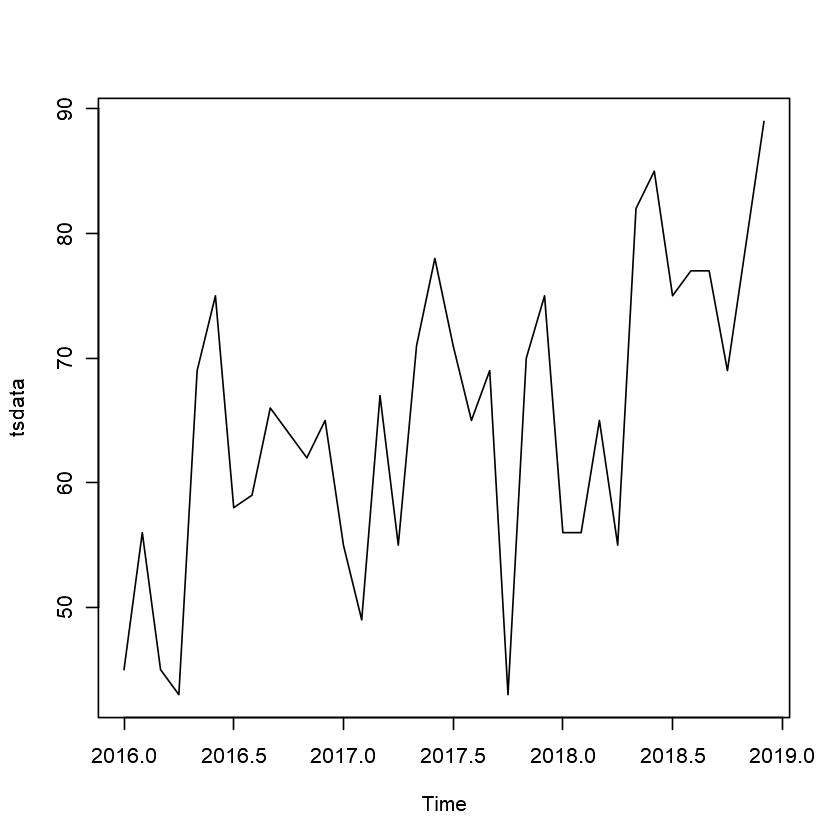

In [21]:
data <- c(45, 56, 45, 43, 69, 75, 58, 59, 66, 64, 62, 65, 
          55, 49, 67, 55, 71, 78, 71, 65, 69, 43, 70, 75, 
          56, 56, 65, 55, 82, 85, 75, 77, 77, 69, 79, 89)

(tsdata <- ts(data, start = c(2016, 1), # 2016년 1월부터
              frequency = 12)) # 연간 12의 빈도로 (월 별)
ts.plot(tsdata, type = "l") # 시계열 추세선

In [22]:
X11()
stl <- head(stl(tsdata, "periodic")) # 시계열 분해
stl$time.series %>% head

seasonal,trend,remainder
-10.224806,55.80897,-0.5841659
-9.110743,56.39643,8.7143139
-4.330003,56.98389,-7.6538833
-12.768267,57.57631,-1.8080415
9.793467,58.16873,1.0378018
14.665933,58.75197,1.5820919


- 계절요인 -> 추세요인 -> 잔차(계절과 추세 적합값과 실제값의 차이)

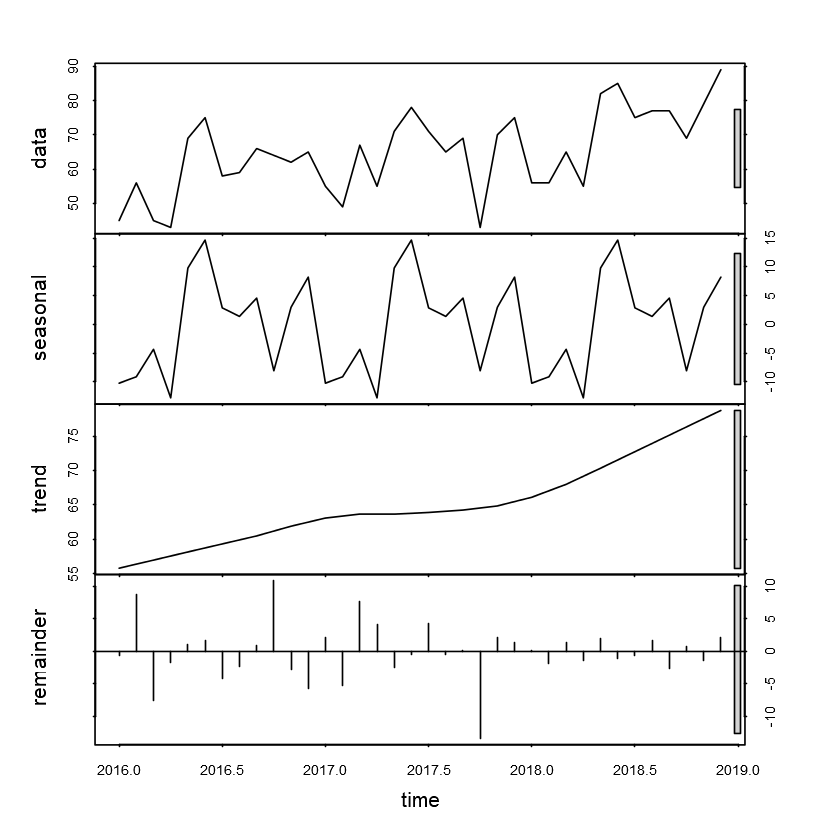

In [23]:
plot(stl(tsdata, "periodic")) # 시계열 분해 시각화

- 원 데이터 -> 계절 -> 추세 -> 잔차

In [24]:
m <- decompose(tsdata) # 시계열 분해
attributes(m)

$names
[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"    

$class
[1] "decomposed.ts"

- ```m$seasonal : 계절요인```
- ```m$trend : 추세요인```
- ```m$random : 불규칙요인```

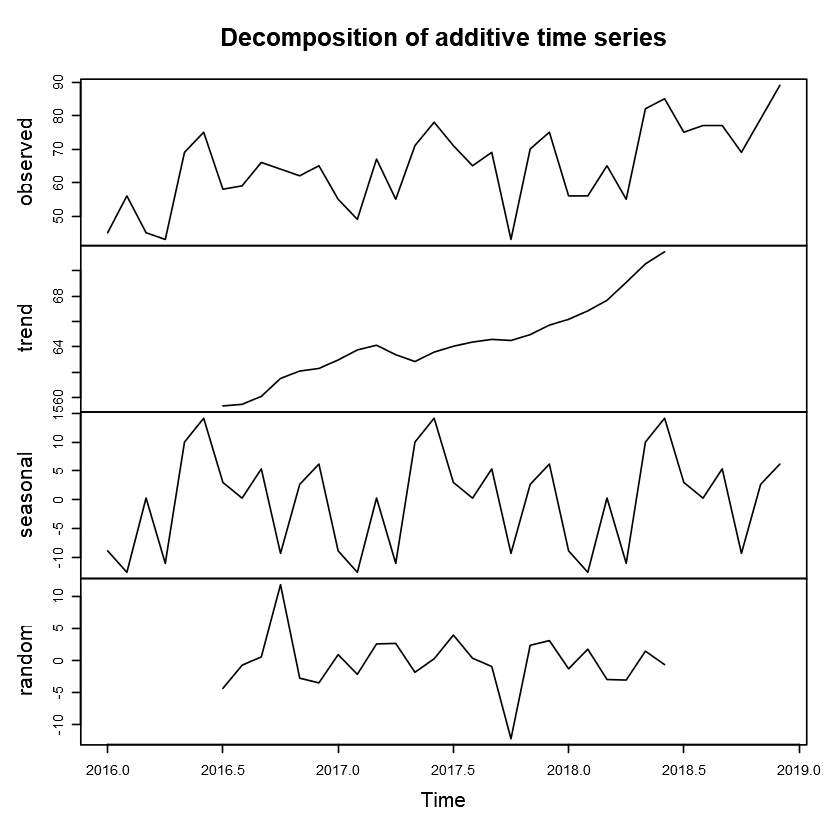

In [25]:
plot(m)

- 관측값 -> 추세 -> 계절 -> 불규칙

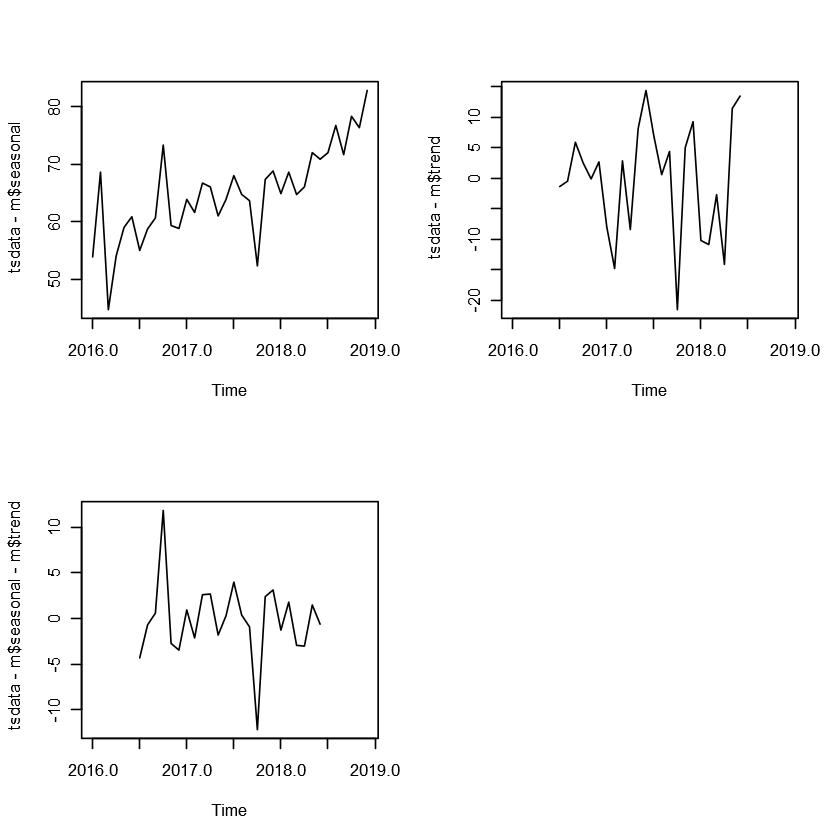

In [26]:
par(mfrow = c(2, 2))
plot(tsdata - m$seasonal) # 계절요인 제거
plot(tsdata - m$trend) # 추세요인 제거 
plot(tsdata - m$seasonal - m$trend) # 불규칙요인만 

## 자기상관함수 / 부분 자기상관함수
### 자기상관성 : 자기상관계수가 유의미한가를 나타내는 특성
### 자기상관계수 : 시계열 자료에서 시차(lag)을 일정하게 줄 때 얻어지는 상관계수

### 자기상관계수 : 
- 서로 이웃한 시점 간의 상관계수를 탐색
- 1차 자기상관계수 : Y(t) - Y(t-1)간의 상관계수

## 부분 자기상관계수 
- 다른 시차들의 시계열 자료가, 서로에 미치는 영향을 제거 한 후 => 주어진 시차에 대한 시계열 간의 상관계수

In [27]:
input <- c(3180, 3000, 3200, 3100, 3300, 3200, 
           3400, 3550, 3200, 3400, 3300, 3700)
tsdata <- ts(input, start = c(2015, 2), frequency = 12)

## 자기상관함수 시각화  / 부분 자기상관함수 시각화 

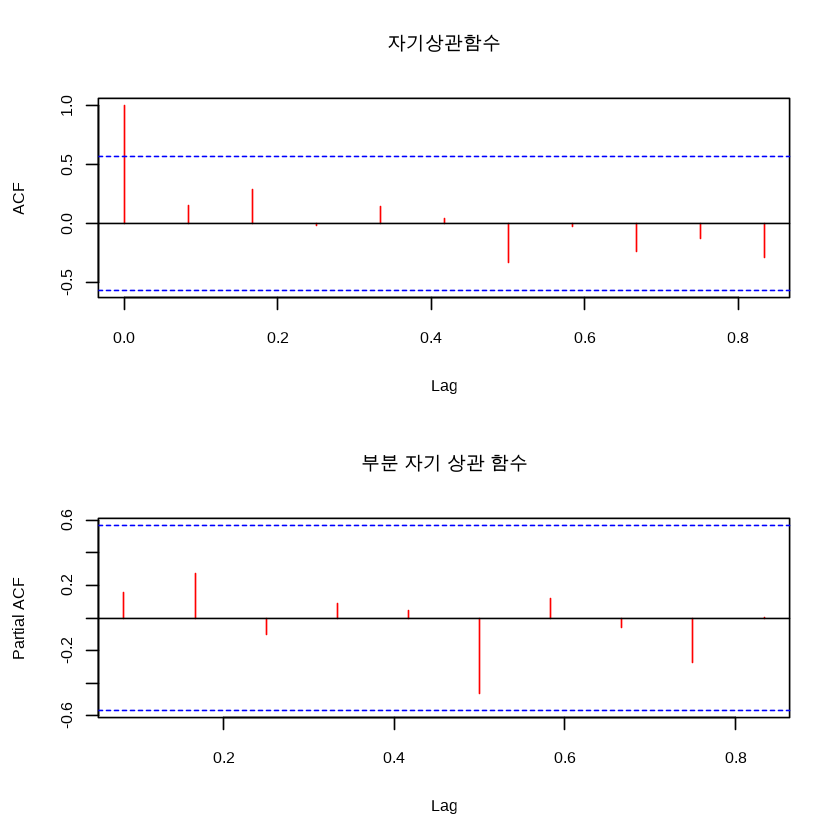

In [32]:
par(mfrow = c(2,1))
acf(na.omit(tsdata), main ="자기상관함수", col = "red")
pacf(na.omit(tsdata), main = "부분 자기 상관 함수", col = "red")

#### 자기상관계수 (ACF)
- 점선 : 유의미한 자기상관관계에 대한 임계값
- 모든 시차(Lag)이 점선 안쪽에 있음 (ACF < 0.5) => 서로 이웃한 시점 간 자기상관성X
- (Lag = 0 => ACF = 1 : 대상 스스로에 대한 상관계수)

#### 부분자기상관계수(PACF)
- 모든 시차(Lag)이 점선 안쪽에 있음 (ACF < 0.5) => 주어진 시점 간 자기상관성X
- Lag = 0.5에서 가장 작은 값(-0.5)

## 시계열 자료의 추세 패턴 찾기 시각화


In [33]:
input <- c(3180, 3000, 3200, 3100, 3300, 3200, 
           3400, 3550, 3200, 3400, 3300, 3700)

- 시계열 자료가 점진적으로 증가하는, 추세의 선형

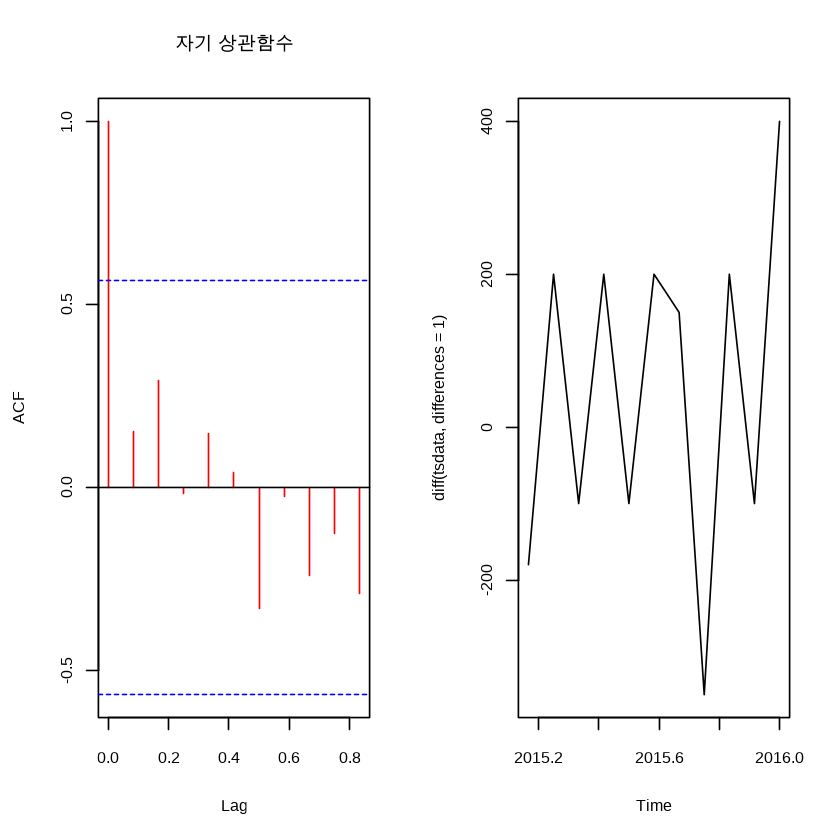

In [34]:
par(mfrow = c(1, 2))
acf(na.omit(tsdata), main = "자기 상관함수", col = "red")
plot(diff(tsdata, differences = 1))

- 자기상관성 없음

- 차분을 수행한 결과가 평균을 중심으로 일정한 폭
- 추세의 패턴 = 선형

## 시계열분석 기법
### 시계열 요소 분해법 : 직관적 방법, 단기 예측, 일변량 변수길이
- 시계열 자료의 4가지 변동요인을 탐색, 시각적 분석
- 추세와 계절 요인은 추세선에서 뚜렷함
- (추세변동 분석 : 시계열 자료가 증가하거나 감소하는 경향이 있는가?
-  증가나 감소의 경향이 선형 or 비선형 or S곡선(성장곡선)인가 ?
1. 차분 후 일정한 값을 나타내면 선형의 패턴(대각선)
2. 로그변환 후 일정한 값을 나타내면 비선형의 패턴(U자, 역U자)
3. 로그변환 후 1차 차분결과가 일정한 값으로 나타나면 성장곡선의 패턴(S자))

## 평활법 : 직관적 방법, 단기 예측, 일변량 변수길이
- 쳬계적인 자료의 흐름을 파악하기 위해, 과거자료의 불규칙한 변동 제거
- 시계열 자료의 뾰족한 작은 변동들을 제거 => 부드러운 곡선으로 조정

### 지수평활법 : 전체 시계열 자료를 평균 계산 => 최근 시계열에 더 큰 가중치

### 이동평균법 (MA) : 일정한 기간의 자료를 평균으로 계산 => 이동시킨 추세를 파악 => 다음 기간의 추세 예측
- 시계열 자료에서 계절변동과 불규칙 변동을 제거하여, 
- 추세변동과 순환변동만 갖는 시계열로 변환(시계열에서 추세와 순환 예측)
- 자료의수가 많고, 비교적 안정적인 패턴을 보이는 경우 효과적 

In [35]:
data <- c(45, 56, 45, 43, 69, 75, 58, 59, 66, 64, 62, 65, 
          55, 49, 67, 55, 71, 78, 71, 65, 69, 43, 70, 75, 
          56, 56, 65, 55, 82, 85, 75, 77, 77, 69, 79, 89)
tsdata <- ts(data, start = c(2016, 1), frequency = 12)

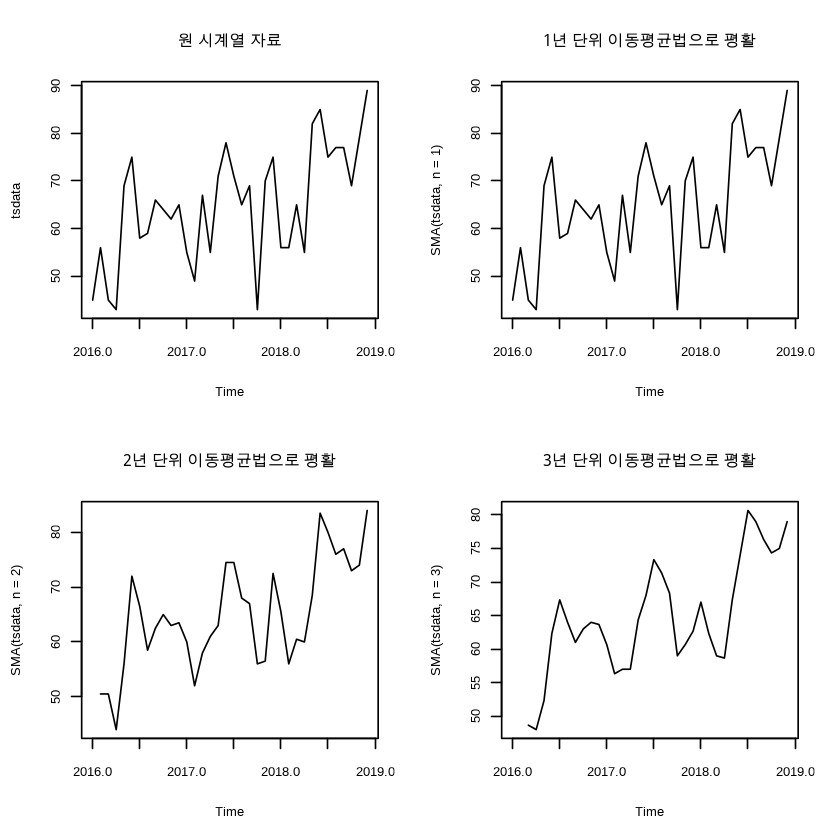

In [36]:
library(TTR)

# 이동평균법으로 평활 및 시각화 
par(mfrow = c(2, 2))
plot(tsdata, main = "원 시계열 자료")
plot(SMA(tsdata, n = 1), main = "1년 단위 이동평균법으로 평활")
plot(SMA(tsdata, n = 2), main = "2년 단위 이동평균법으로 평활")
plot(SMA(tsdata, n = 3), main = "3년 단위 이동평균법으로 평활")
par(mfrow = c(1, 1))

- 가장 평탄한 형태로 분포된 결과를 선정 => 추세를 예측하는데 사용
- 3년 단위 평균으로 평활한 결과가 가장 평탄

## 일반 회귀모형 : 통계적 방법, 단기 예측, 일변량 변수길이
- 반응변수 (시계열 자료) ~ 설명변수 (t)
- 계량경제 회귀모형 : 통계적 방법, 장기 예측, 다변량 변수길이
- Y(t)와 Y(t-1)사이의 시계열 자료를 대상으로 회귀분석

## ARIMA 모형법 : 통계적 방법, 단기 예측, 다변량 변수길이
### 정상성 시계열 모형 : 자기회귀모형(AR), 이동평균모형(MA), 자기회귀 이동평균모형(ARMA)
### 비정상성 시계열 모형 : 자기회귀 누적 이동평균모형
### (정상성 : 뚜렷한 추세가 없음, 시계열의 평균이 시간축에 평행하게 나타남)
# (대부분의 시계열 자료는 비정상성 시계열)

### ARIMA(p,d,q)
- p : 자기회귀모형(AR) 차수, (if d = 0 =>  ARMA(p,q))
- d : 차분 차수, (if p = 0 => IMA(d,q) & d번 차분 => MA(q))
- q : 이동평균모형(MA) 차수 (if q = 0 => IAR(p,d) & d번 차분 => AR(p))

### ARIMA(p,d,q)를 d번 차분 => ARMA(p,q) => 비정상성을 정상성으로 바꿈

## ARIMA 절차
1. 식별 : 현재 시계열 자료가 어떤 모형에 해당하는지 판단 (acf, pacf 활용), (p,d,q)결정
2. 추정 : 식별된 모형의 파라미터 추정 (최소제곱법 이용)
3. 진단 : 모형식별과 파라미터 추정이 적한한지 검증 (잔차가 백색잡음이면 적합)
(백색잡음 : 모형의 잔차가 불규칙적, 독립적, 즉 특정 시차간 데이터가 관련성X)

### ARIMA 모형 시계열 예측
1. 시계열 자료 특성분석 (정상성/비정상성)
2. 정상성 시계열 변환
3. 모형식별과 추정
4. 모형생성
5. 모형진단 (타당성 검정)
6. 미래예측

In [37]:
#계절성이 없는 정상성 시계열분석
input <- c(3180, 3000, 3200, 3100, 3300, 3200, 
           3400, 3550, 3200, 3400, 3300, 3700)
# 시계열 객체 생성(12개월: 2015 2월 ~ 2016년 1월)
(tsdata <- ts(input, start = c(2015, 2), frequency = 12))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300
2016,3700,,,,,,,,,,,


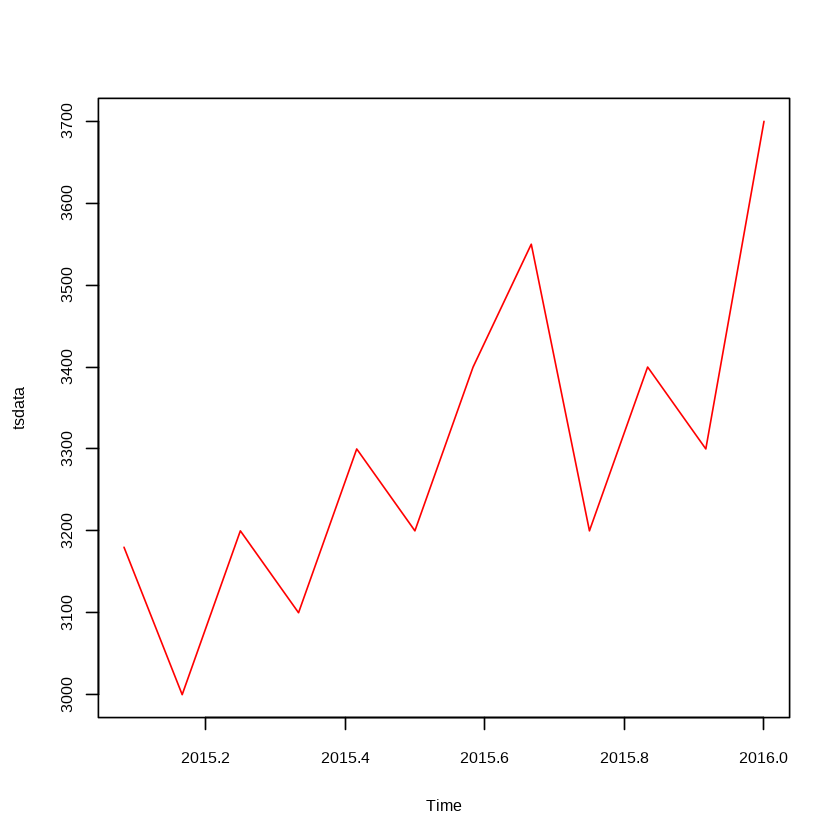

In [38]:
plot(tsdata, type = "l", col = "red")

- 일정하지 않은 진폭 => 비정상성 시계열로 판단 => 차분을 통해서 정상성 시게열로 변경

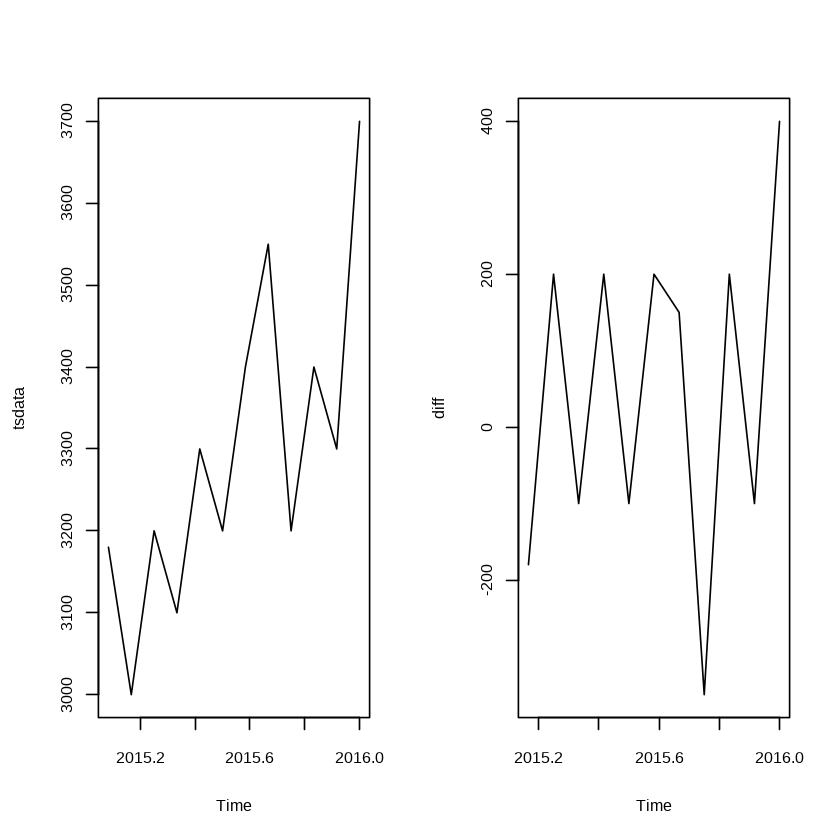

In [39]:
# 정상성 시계열 변환
par(mfrow = c(1, 2))
ts.plot(tsdata)
diff <- diff(tsdata) # 차분 
plot(diff) 

- 평균 정상화를 위해서 차분을 이용하여 비정상성 시계열이 정상성 시계열로 변경된 것을 확인
- 계절차분 : 계절성을 갖는 경우의 차분

## auto.arima()

In [41]:
library(forecast)
(arima <- auto.arima(tsdata))

Series: tsdata 
ARIMA(1,1,0) 

Coefficients:
          ar1
      -0.6891
s.e.   0.2451

sigma^2 = 31644:  log likelihood = -72.4
AIC=148.8   AICc=150.3   BIC=149.59

- ARIMA(1,1,0), 한 번 차분한 결과가 정상성 시계열 ARMA(1,0)

In [ ]:
(model <- arima(tsdata, order = c(1, 1, 0)))
model$call

- 모형의 적합성 검증을 위해서 잔차가 백색잡음인가를 탐색
- 백색잡음 : 모형의 잔차가 불규칙적, 독립적으로 분포된 경우, 즉 특정 시차 간의 데이터가 서로 관련성이 없다(독립)이라는 의미.

## 모형의 적합성 검증
1. if 자기상관함수의 결과가 유의미한 시차가 없는경우 
2. if 오차 간 상관관계가 존재하는지 검정 (Box-Ljung test)에서 p-value 0.05이상
- 잔차 = 백색잡음

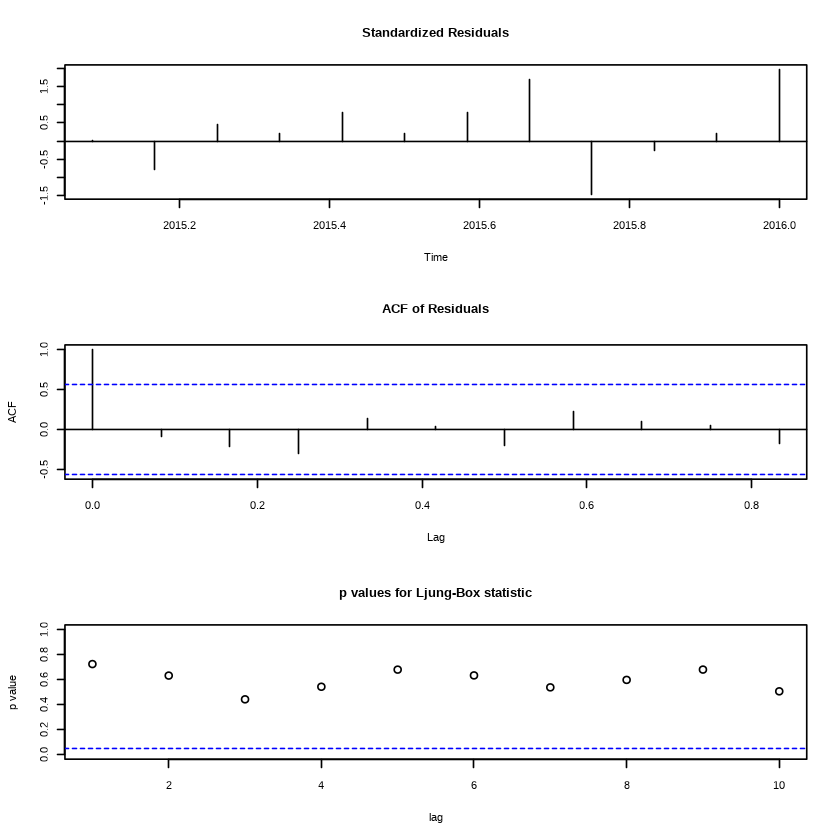

In [44]:
tsdiag(model) # 자기 상관 함수에 의한 모형 진단

- 잔차의 ACF에서 자기상관X 
- Box-Ljung test의 p-value > 0 
- 매우 양호한 시계열 모형

### Box-Ljung에 의한 잔차항 모형 진단

In [45]:
Box.test(model$residuals, lag = 1, type = "Ljung")


	Box-Ljung test

data:  model$residuals
X-squared = 0.12353, df = 1, p-value = 0.7252


- Box-Ljung 검정방법은 모형의 잔차를 이용하는 카이제곱 검정방법, 시계열 모형이 통계적으로 적절한지를 검정
- P-value > 0.05 => 귀무가설 (시계영 모형이 적절) 기각 불가
- p-value > 0.05 => 시계열 모형이 적절
- 잔차항은 서로 독립 => 백색잡음과정


## 미래예측

In [53]:
tsdata

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,3180,3000,3200,3100,3300,3200,3400,3550,3200,3400,3300
2016,3700,,,,,,,,,,,


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2016       3424.367 3207.007 3641.727 3091.944 3756.791
Mar 2016       3614.301 3386.677 3841.925 3266.180 3962.421
Apr 2016       3483.421 3198.847 3767.995 3048.203 3918.639
May 2016       3573.608 3272.084 3875.131 3112.467 4034.748
Jun 2016       3511.462 3175.275 3847.649 2997.308 4025.615
Jul 2016       3554.286 3199.003 3909.568 3010.928 4097.643

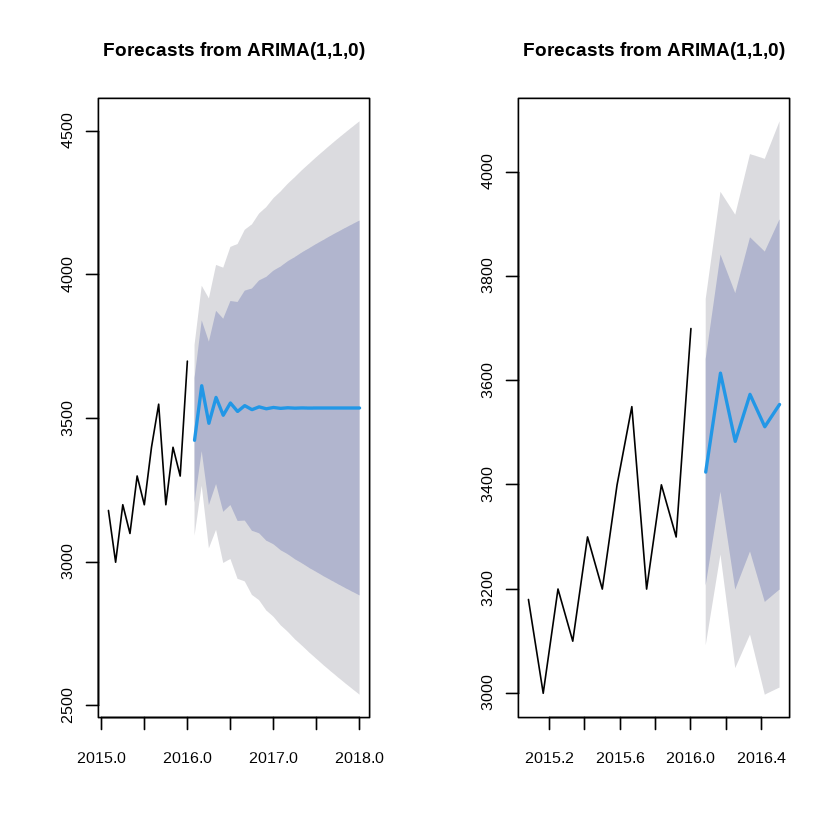

In [56]:
par(mfrow = c(1, 2))
fore <- forecast(model) # 적합값
model2 <- forecast(model, h = 6) # 향후 6개월 예측값
model2 
plot(fore) ; plot(model2)

- 계절성이 없는 정상성 시계열의 ARIMA(1,1,0) 모형에 의해서
- 80% 신뢰구간, 95%신뢰구간으로 예측한 결과

## 계절성을 갖는 정상성 시계열분석

In [57]:
data <- c(55, 56, 45, 43, 69, 75, 58, 59, 66, 64, 62, 65, 
          55, 49, 67, 55, 71, 78, 61, 65, 69, 53, 70, 75,  
          56, 56, 65, 55, 68, 80, 65, 67, 77, 69, 79, 82,
          57, 55, 63, 60, 68, 70, 58, 65, 70, 55, 65, 70)
(tsdata <- ts(data, start = c(2020, 1), frequency = 12))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,55,56,45,43,69,75,58,59,66,64,62,65
2021,55,49,67,55,71,78,61,65,69,53,70,75
2022,56,56,65,55,68,80,65,67,77,69,79,82
2023,57,55,63,60,68,70,58,65,70,55,65,70


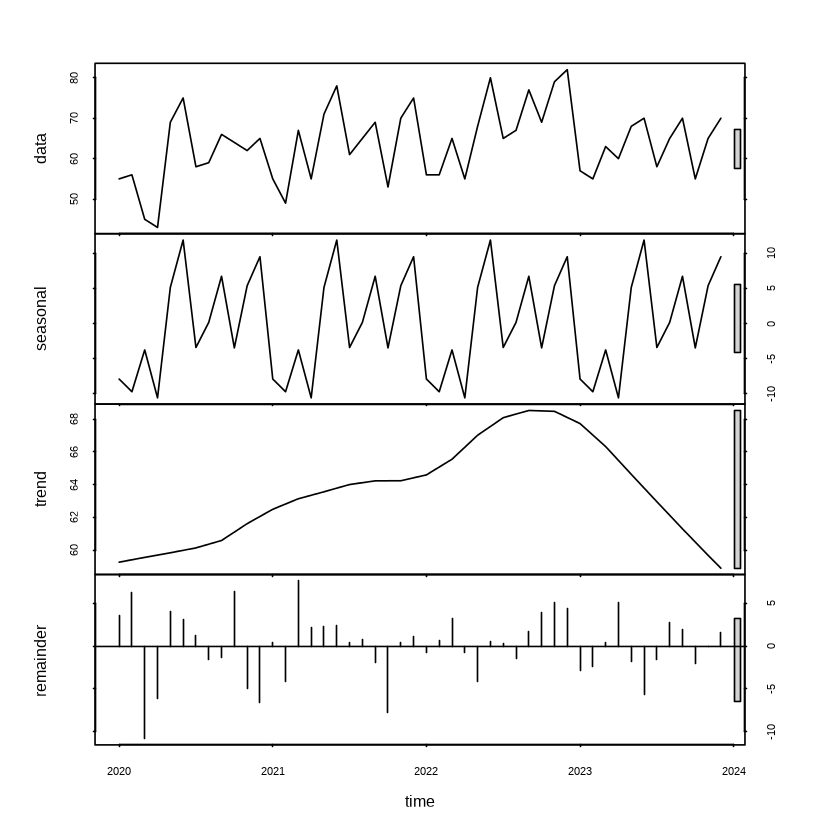

In [58]:
ts_feature <- stl(tsdata, "periodic") 
plot(ts_feature) # 시계열 요소분해 시각화

- 계절요인이 뚜렷하게 발견 => tsdata는 계절성을 갖는 시계열 자료 => 차분을 통해서 정상성 시계열로 변환 (계절성을 갖는 경우 계절 차분 적용)

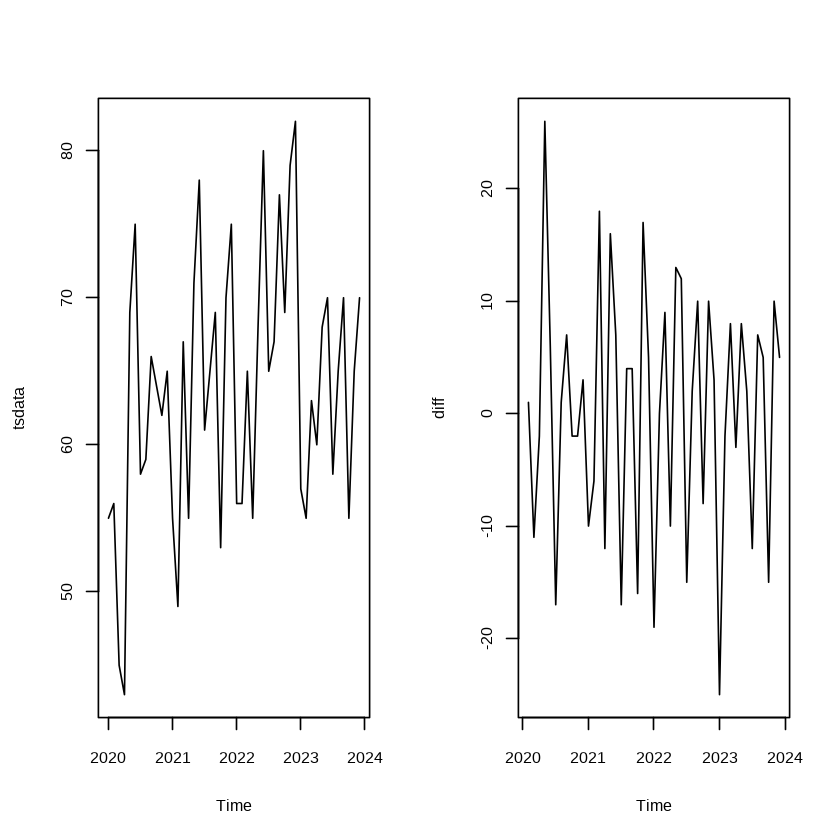

In [59]:
par(mfrow = c(1, 2))
ts.plot(tsdata)
diff <- diff(tsdata) # 차분 => 정상성 시계열
plot(diff)

In [60]:
(ts_model2 <- auto.arima(tsdata))

Series: tsdata 
ARIMA(0,1,1)(1,1,0)[12] 

Coefficients:
          ma1     sar1
      -0.6580  -0.5317
s.e.   0.1421   0.1754

sigma^2 = 41.97:  log likelihood = -116.31
AIC=238.62   AICc=239.4   BIC=243.29

- 첫 번째 파라미터 (0,1,1) : 이동평균 모형 차수는 1, 차분 차수는 1 (1번 차분시 ARMA(0,1))
- 두 번째 파라미터 (1.1.0) : 계절성을 갖는 자기회귀모형(AR)차수가 1 => 즉, 계절성을 갖는 시계열
- [12] : 계절의 차수 12개월

In [61]:
ts_model2$coef # 이동평균모형의 차수, 계절성의 자기회귀차수의 계수

ma1       sar1 
-0.6579898 -0.5317490

In [63]:
# 모형 생성
(model <- arima(tsdata, c(0, 1, 1), seasonal = list(order = c(1, 1, 0))))


Call:
arima(x = tsdata, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0)))

Coefficients:
          ma1     sar1
      -0.6580  -0.5317
s.e.   0.1421   0.1754

sigma^2 estimated as 39.57:  log likelihood = -116.31,  aic = 238.62

- 이전 단계에서 식별된 모형과 파라미터를 이용하여 시계열 모형을 생성
- 계절성이 있는 모형을 생성할 경우 seasonal 속성을 이용하여 게절성과 관련된 파라미터를 지정하여 ARIMA 모형 생성
- 생성된 모형의 결과에서 MA모형과 계절성을 갖는 AR모형의 계수값과 표준 오차를 확인할 수 있다.

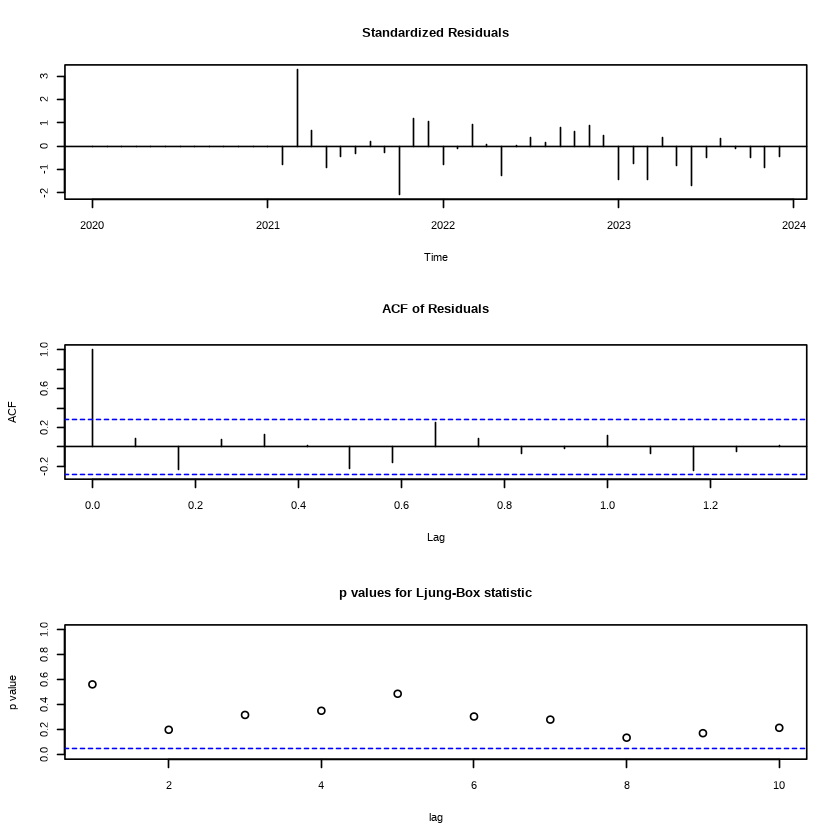

In [64]:
tsdiag(model)

- 잔차의 ACF에서 자기상관X 
- Box-Ljung test의 p-value > 0 
- 매우 양호한 시계열 모형

In [65]:
Box.test(model$residuals, lag = 1, type = "Ljung")


	Box-Ljung test

data:  model$residuals
X-squared = 0.33656, df = 1, p-value = 0.5618


- p-value > 0.05 => 시계열 모형이 적절

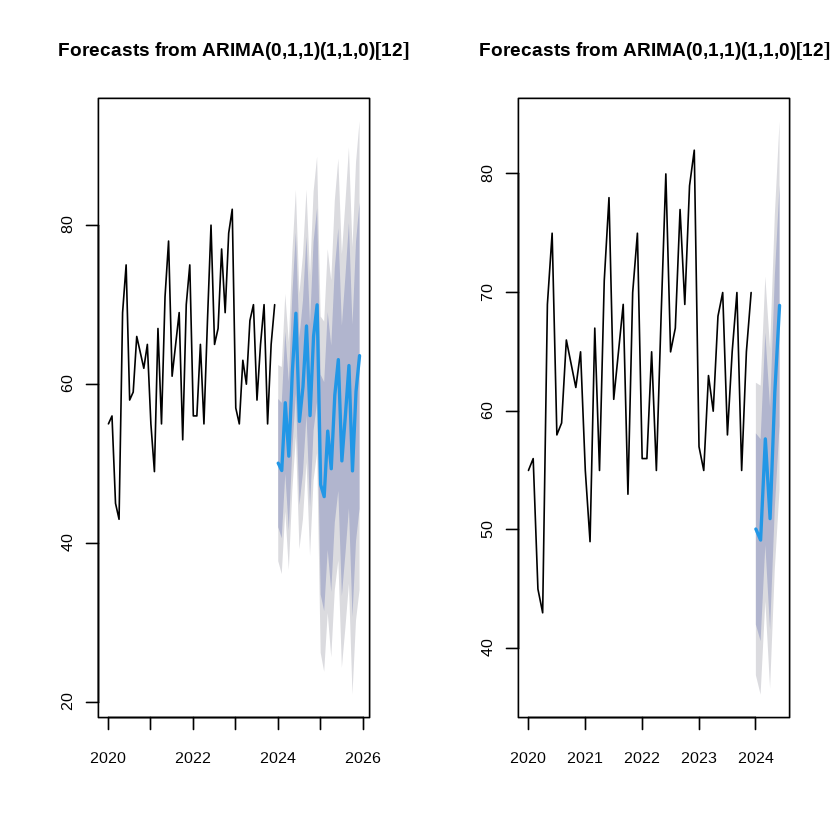

In [66]:
par(mfrow = c(1, 2))
fore <- forecast(model, h = 24) ; plot(fore)
fore2 <- forecast(model, h = 6) ; plot(fore2)
par(mfrow = c(1,1))

## ********

In [67]:
king <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat", skip = 3)


Autocorrelations of series 'king.ff1', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.360 -0.162 -0.050  0.227 -0.042 -0.181  0.095  0.064 -0.116 -0.071 
    11     12     13     14     15     16     17     18     19     20 
 0.206 -0.017 -0.212  0.130  0.114 -0.009 -0.192  0.072  0.113 -0.093 


Partial autocorrelations of series 'king.ff1', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.360 -0.335 -0.321  0.005  0.025 -0.144 -0.022 -0.007 -0.143 -0.167  0.065 
    12     13     14     15     16     17     18     19     20 
 0.034 -0.161  0.036  0.066  0.081 -0.005 -0.027 -0.006 -0.037 

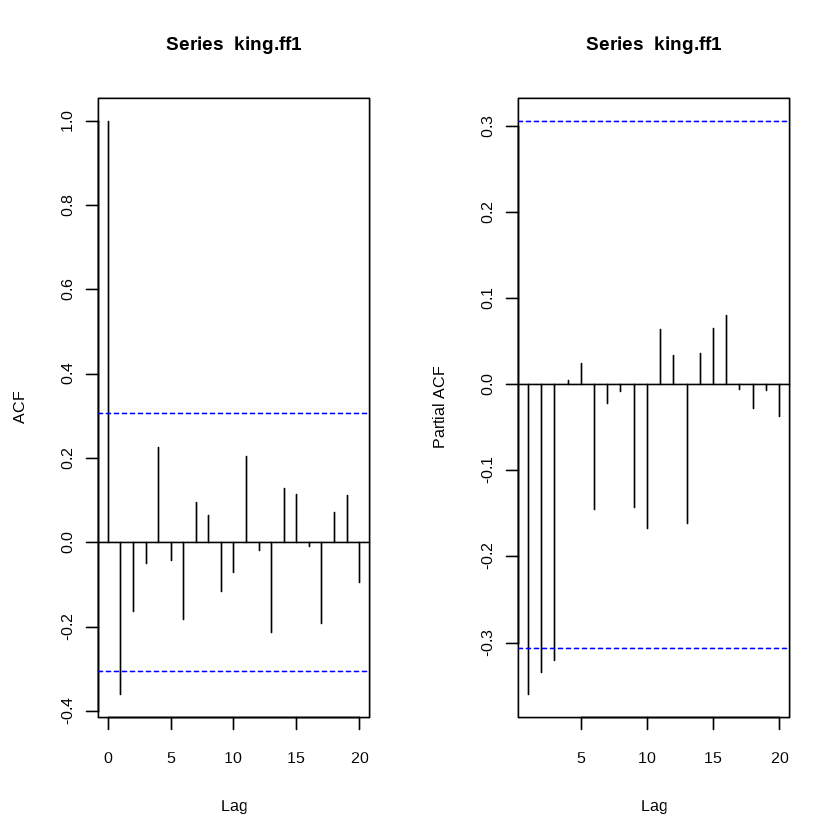

In [68]:
king.ts <- ts(king)

par(mfrow = c(1, 2))
king.ff1 <- diff(king.ts, differences = 1)
king.acf <- acf(king.ff1, lag.max = 20, plot = T)
king.acf

king.pacf <- pacf(king.ff1, lag.max = 20, plot = T)
king.pacf

- ACF 그래프는 자기상관함수로 계산된 시차에서 자기상간값과 시차 상관그림을 함께 그린 것으로 이동평균(MA)모형을 선정하기 위해 사용하는 그래프
- ACF그래프를 확인한 결과, lag1인 지점까지는 점선 구간을 초과하고, 나머지는 모두 점선 구간 안에 있으므, lag2에서 절단점을 가짐으로 MA(1)모형 생성 가능

- PACF그래프는 서로 다른 두 시점 사이의 관계를 분석할 때 중간에 존재하는 값을 제외하고 나타낸 상관계수를 구하여 그린것으로 자기회귀(AR)모형을 선정하기 위해 사용하는 그래프이다.
- PACF 그래프를 확인한 결과, lag3인 지점까지는 점선 구간을 초과하고 나머지는 점선 구간안에 있으므로 lag4에서 절단점 => AR(3)모형 생성

In [69]:
auto.arima(king.ts)

Series: king.ts 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 = 236.2:  log likelihood = -170.06
AIC=344.13   AICc=344.44   BIC=347.56

In [73]:
king.arima <- arima(king, order = c(0, 1, 1))
king.forecasts <- forecast(king.arima)
king.forecasts

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.29647 87.20479 37.99806  97.50319
44       67.75063 47.55748 87.94377 36.86788  98.63338
45       67.75063 46.84460 88.65665 35.77762  99.72363
46       67.75063 46.15524 89.34601 34.72333 100.77792
47       67.75063 45.48722 90.01404 33.70168 101.79958
48       67.75063 44.83866 90.66260 32.70979 102.79146
49       67.75063 44.20796 91.29330 31.74523 103.75603
50       67.75063 43.59372 91.90753 30.80583 104.69543
51       67.75063 42.99472 92.50653 29.88974 105.61152
52       67.75063 42.40988 93.09138 28.99529 106.50596

- 모형이 ARIMA(0, 1, 1)으로 선정 => 시계열 모형식 : Z_t = a_t + 0.7218 * a_(t-1)
- ARIMA(0, 1, 1)모형으로 예측했을 때, 43번째에서 52번째 왕의 사망시 나이 예측 결과는 67.75살로 추정
- 최종적으로 ACF그래프를 통해 MA(1)모형을 생성, PACF그래프를 통해 AR(3)모형을 생성
- auto.arima함수를 활용하여 ARIMA(0, 1, 1)모형을 선정

### 단위근 검정 (KPSS)
- 귀무가설 : 차분이 필요하다
- 대립가설 : 차분이 필요없다

In [74]:
library(urca)

In [81]:
diff1 <- diff(AirPassengers, 1)
ur.kpss(diff1)


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0146 


- 검정통계량 > 0.05 => 귀무가설 기각X
- 귀무가설 기각하지 못할시

In [80]:
diff2 <- diff(AirPassengers, 2)
ur.kpss(diff2) %>% summary


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 4 lags. 

Value of test-statistic is: 0.0175 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739
